In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [17]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 6704 rows and 6 columns


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 235.8+ KB


In [19]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [20]:
cat_cols = ['Gender', 'Education Level', 'Job Title']
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        m = df[col].mode()[0]
        df[col].fillna(m, inplace=True)
print(df[cat_cols].isnull().sum())

<ipython-input-20-656f591d3c6d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(m, inplace=True)


Gender             0
Education Level    0
Job Title          0
dtype: int64


In [21]:
num_cols = ['Age', 'Years of Experience', 'Salary']
for col in num_cols:
    if df[col].isnull().sum() > 0:
        m = df[col].median()
        df[col].fillna(m, inplace=True)
print(df[num_cols].isnull().sum())

<ipython-input-21-81d09b618d15>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(m, inplace=True)
<ipython-input-21-81d09b618d15>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col

Age                    0
Years of Experience    0
Salary                 0
dtype: int64


In [22]:
df.describe(include='all')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,6704.000000,6704,6704,6704,6704.000000,6704.000000
unique,NaN,3,7,193,NaN,NaN
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN
freq,NaN,3676,2270,520,NaN,NaN
mean,33.620376,NaN,NaN,NaN,8.094197,115326.720913
std,7.613548,NaN,NaN,NaN,6.057691,52766.493471
min,21.000000,NaN,NaN,NaN,0.000000,350.000000
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000


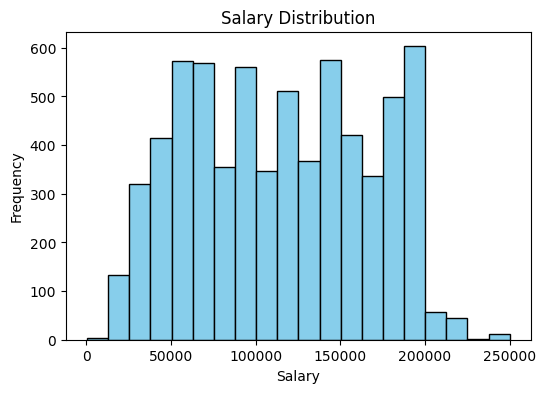

In [23]:
plt.figure(figsize=(6,4))
plt.hist(df['Salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

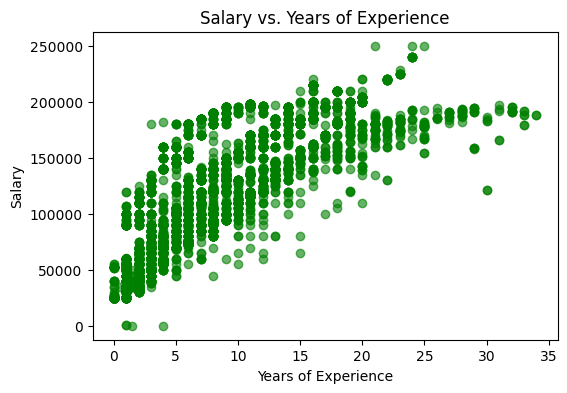

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(df['Years of Experience'], df['Salary'], color='green', alpha=0.6)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

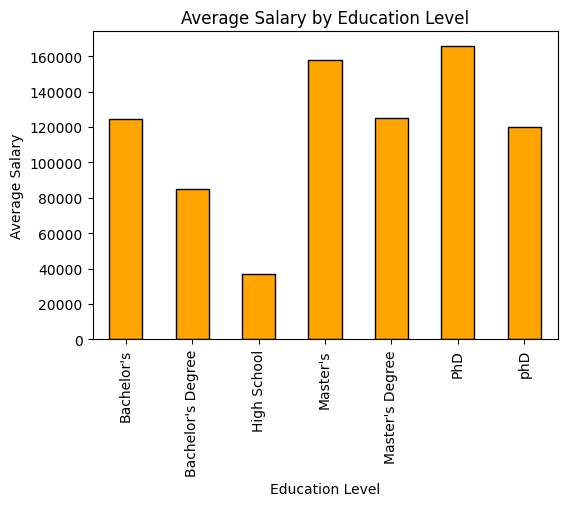

In [25]:
edu_salary = df.groupby('Education Level')['Salary'].mean()
edu_salary.plot(kind='bar', figsize=(6,4), color='orange', edgecolor='black')
plt.title('Average Salary by Education Level')
plt.ylabel('Average Salary')
plt.show()

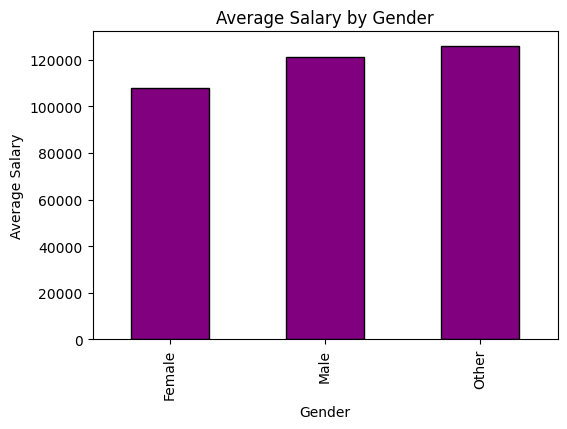

In [26]:
gender_salary = df.groupby('Gender')['Salary'].mean()
gender_salary.plot(kind='bar', figsize=(6,4), color='purple', edgecolor='black')
plt.title('Average Salary by Gender')
plt.ylabel('Average Salary')
plt.show()

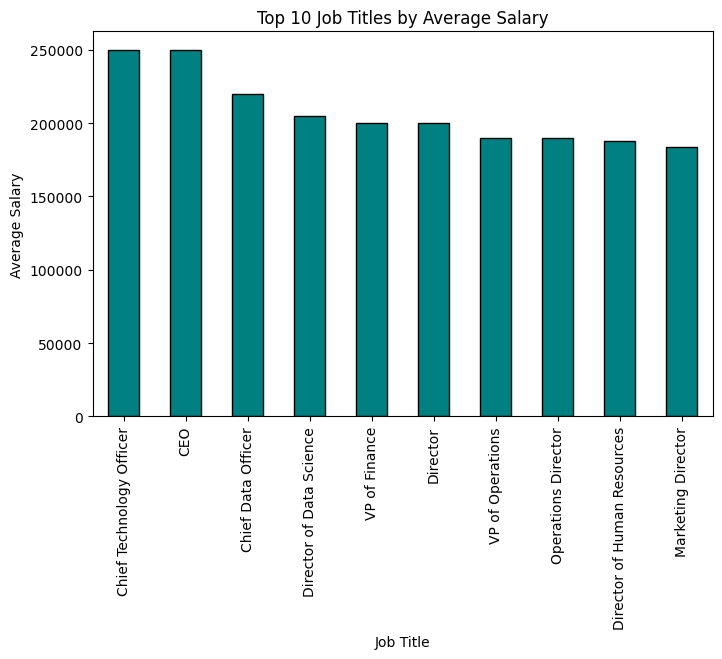

In [27]:
job_salary = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False).head(10)
job_salary.plot(kind='bar', figsize=(8,5), color='teal', edgecolor='black')
plt.title('Top 10 Job Titles by Average Salary')
plt.ylabel('Average Salary')
plt.show()

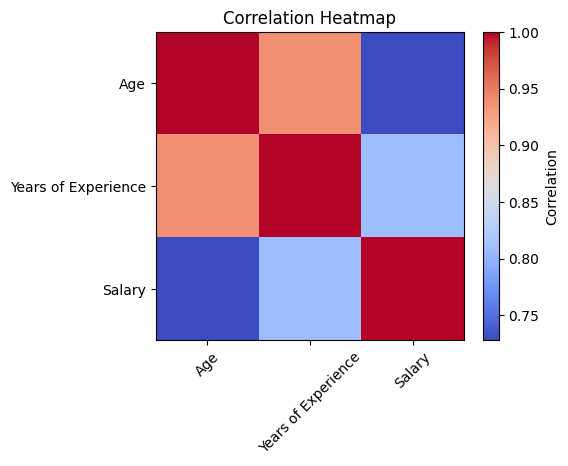

In [28]:
corr = df[num_cols].corr()
plt.figure(figsize=(5,4))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()